# Install dependencies

# Import Libraries and files

In [1]:
from ultralytics import YOLO
import numpy as np
import json
import matplotlib.pyplot as plt
import tifffile
import matplotlib.patches as patches
from PIL import Image
import time

In [24]:
def plot_images_with_bboxes(image, predicted, bboxes_labels):

    IMAGE_DIR = "combined_images/"

    # Read and draw the bounding2 boxes
    #bboxes = sample_info['rocks_annotations']  # Assuming each image has a 'annotations' field containing the bounding boxes

    #  Open and display the image
    image = tifffile.imread(image)
    f, ax = plt.subplots(1,2)
    f.set_figheight(15)
    f.set_figwidth(15)
    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].title.set_text('swissIMAGE early fusion')

    for box in bboxes_labels:
        x,y = box['pixel_within_patch_coordinates'] 
        # Draw the square as a patch (red square)
        rect = patches.Circle((x, y), radius=20,  linewidth=2, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)


    pred = Image.open(predicted)
    ax[1].imshow(pred)
    ax[1].axis('off')
    ax[1].title.set_text('Predicted rocks')
    
    # Show the plot with bounding boxes
    plt.show()



0: 640x640 (no detections), 101.8ms
1: 640x640 (no detections), 101.8ms
2: 640x640 (no detections), 101.8ms
Speed: 3.0ms preprocess, 101.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to 20250101-201913\predict


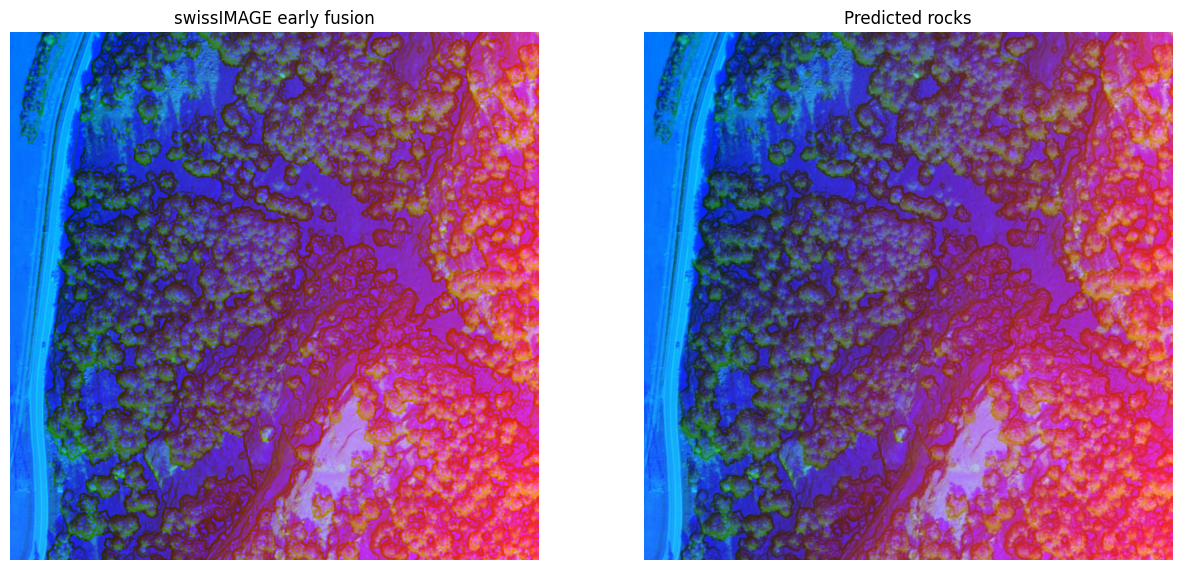

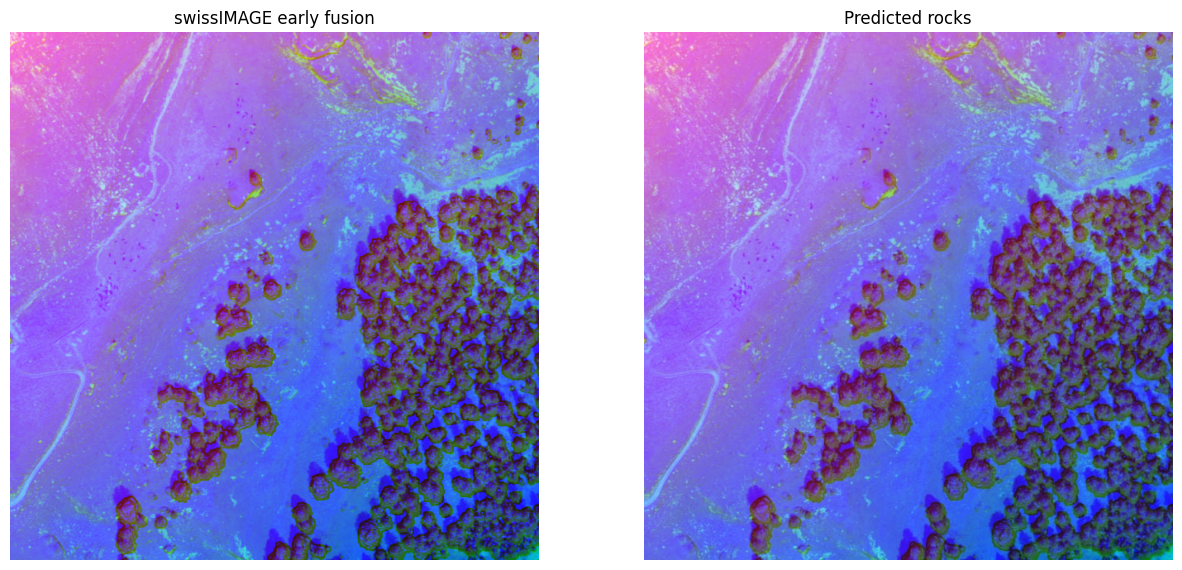

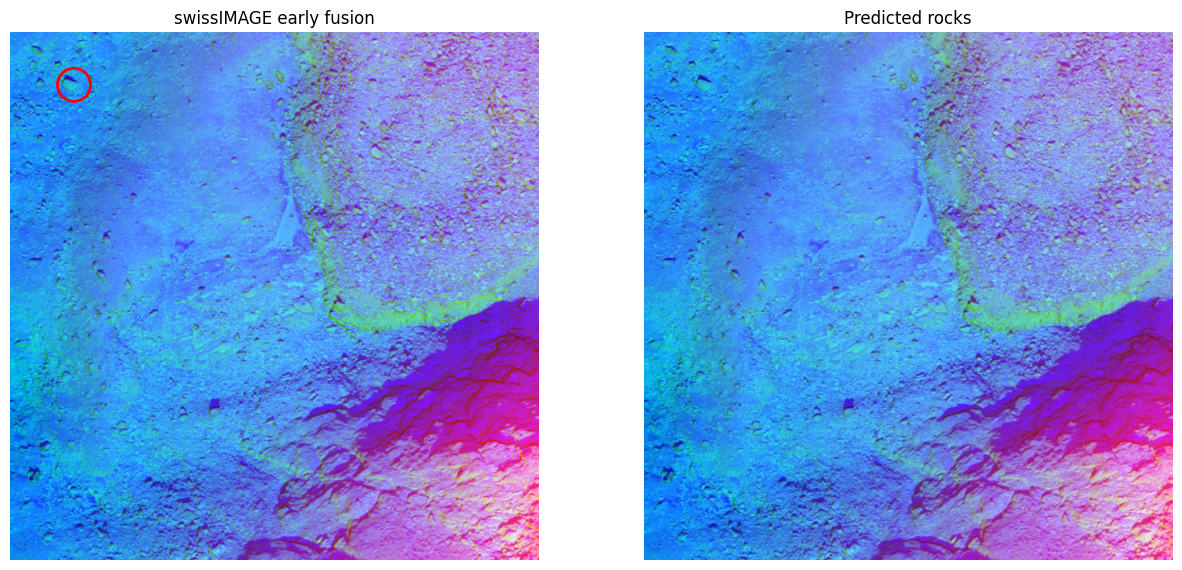

In [45]:
COMBINED_DIR = "combined_images/"
IMAGE_DIR = "swissImage_50cm_patches"
USE_GPU = False
json_file_path = "large_rock_dataset.json"

model_SGH = YOLO('models/best_SGH.pt')
model_RGB = YOLO('models/best_RGB.pt')

with open(json_file_path, 'r') as file:
        data = json.load(file)
        dataset = data['dataset']

image_files = [sample["file_name"].replace(".tif", "") for sample in dataset]
if USE_GPU:
    model_SGH.to('cuda')
    model_RGB.to('cuda')



# Choose 3 images
predictions_images = np.random.choice(range(len(image_files)), 3)
# validate and plot predictions
time_str = f'{time.strftime("%Y%m%d-%H%M%S")}'

image_file = [IMAGE_DIR + dataset[img_idx]["file_name"] for img_idx in predictions_images]
results = model(image_file , save=True, project=time_str)
idx=0
for img_path in image_file:

    plot_images_with_bboxes(img_path, f'{time_str}/predict/' + image_files[predictions_images[idx]] + '.jpg' , dataset[predictions_images[idx]]['rocks_annotations'])
    idx+=1

    


